- **Import necessary libraries**:
  - `pandas` for data manipulation.
  - `numpy` for numerical operations.
  - `matplotlib.pyplot` for plotting.
  - `AdaBoostClassifier` and `DecisionTreeClassifier` from `sklearn.ensemble` and `sklearn.tree` for model creation.
  - `accuracy_score` from `sklearn.metrics` for evaluating model performance.
  - `train_test_split` from `sklearn.model_selection` for splitting data (though not used in this snippet).

- **Set a random seed** (`random = 15`) for reproducibility.

- **Load training and testing datasets**:
  - Read `train_data.csv` and `test_data.csv` into `train_data` and `test_data` DataFrames, respectively.

- **Separate features and target variables**:
  - For training data (`train_data`):
    - `X_train` contains all columns except the last (features).
    - `y_train` contains the last column (target variable).
  - For testing data (`test_data`):
    - `X_test` contains all columns except the last (features).
    - `y_test` contains the last column (target variable).

- **Prepare data for modeling**:
  - Split the datasets into feature matrices (`X_train`, `X_test`) and target vectors (`y_train`, `y_test`) for training and testing.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

random = 15  # Set random seed for reproducibility

# Load train and test data
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Separate features and target variable for training and testing
X_train = train_data.iloc[:, :-1]  # All columns except the last
y_train = train_data.iloc[:, -1]   # Last column as target

X_test = test_data.iloc[:, :-1]         # All columns except the last
y_test = test_data.iloc[:, -1]          # Last column as target

----
- **Initialize a dictionary (`results`)** to store models and errors for Gini and Entropy criteria.

- **Loop over Gini and Entropy**:
  - Create a `DecisionTreeClassifier` (max_depth=1) as the base estimator.
  - Build an `AdaBoostClassifier` with 100 estimators and a learning rate of 1.0.
  - Train the model on `X_train` and `y_train`.

- **Make predictions** on training and test data.

- **Compute and stores errors**:
  - Training and test errors calculated using `1 - accuracy_score`.

- **Output results**:
  - Prints training and test errors for both Gini and Entropy criteria.

In [4]:
# Initialize a dictionary to store results
results = {
    "gini": {"model": None, "train_error": None, "test_error": None},
    "entropy": {"model": None, "train_error": None, "test_error": None}
}

# Loop over Gini and Entropy criteria
for criterion in ["gini", "entropy"]:
    # Define the base estimator (weak learner) with the specified criterion
    base_estimator = DecisionTreeClassifier(max_depth=1, criterion=criterion, random_state=random)

    # Define the AdaBoost classifier
    adaboost_clf = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=100,
        learning_rate=1.0,
        random_state=random
    )

    # Train AdaBoost on the training data
    adaboost_clf.fit(X_train, y_train)

    # Store the trained model
    results[criterion]["model"] = adaboost_clf

    # Predict on the training and test data
    y_train_pred = adaboost_clf.predict(X_train)
    y_test_pred = adaboost_clf.predict(X_test)

    # Compute errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    # Store errors
    results[criterion]["train_error"] = train_error
    results[criterion]["test_error"] = test_error

# Output results
for criterion, metrics in results.items():
    print(f"\nAdaBoost with {criterion.capitalize()}:")
    print(f"Training Error: {metrics['train_error']:.4f}")
    print(f"Test Error: {metrics['test_error']:.4f}")


AdaBoost with Gini:
Training Error: 0.0269
Test Error: 0.0620

AdaBoost with Entropy:
Training Error: 0.0274
Test Error: 0.0641


----
- **Define a range of `n_estimators`** (number of boosting iterations) to test: `[10, 50, 100, ..., 500]`.

- **Initialize lists** to store training and test errors for each `n_estimators` value.

- **Loop over each `n_estimators` value**:
  - Create an `AdaBoostClassifier` with:
    - A `DecisionTreeClassifier` (max_depth=1) as the weak learner.
    - The current `n_estimators` value.
    - A learning rate of 1.0.
    - A fixed random seed for reproducibility.
  - Train the model on `X_train` and `y_train`.
  - Predict on training (`X_train`) and test (`X_test`) data.
  - Compute training and test errors using `1 - accuracy_score`.
  - Store errors in `train_errors` and `test_errors` lists.

- **Plot the results**:
  - Create a line plot showing training and test errors vs. `n_estimators`.
  - Include labels, a legend, and a grid for clarity.

- **Identify the optimal `n_estimators`**:
  - Find the value of `n_estimators` that minimizes the test error.
  - Print the optimal `n_estimators` and the corresponding minimum test error.

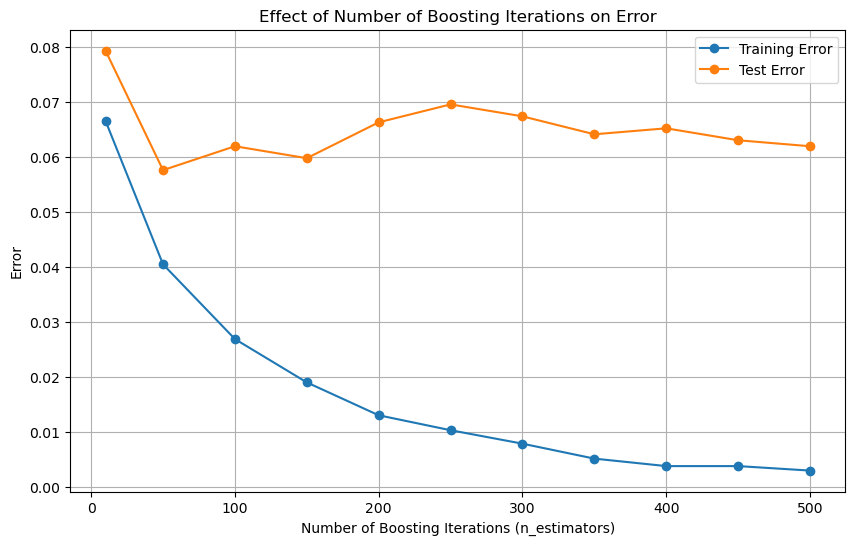

Optimal number of estimators: 50
Minimum test error: 0.0576


In [5]:
# Define a range of n_estimators to experiment with
n_estimators_range = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Initialize lists to store errors
train_errors = []
test_errors = []

# Loop over different values of n_estimators
for n_estimators in n_estimators_range:
    # Define the AdaBoost classifier with the current number of estimators
    adaboost_clf = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),  # Weak learner
        n_estimators=n_estimators,                           # Number of boosting iterations
        learning_rate=1.0,                                   # Learning rate
        random_state=random                                      # For reproducibility
    )
    
    # Train the AdaBoost model on the training data
    adaboost_clf.fit(X_train, y_train)
    
    # Predict on the training and test data
    y_train_pred = adaboost_clf.predict(X_train)
    y_test_pred = adaboost_clf.predict(X_test)
    
    # Compute errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_errors, label="Training Error", marker='o')
plt.plot(n_estimators_range, test_errors, label="Test Error", marker='o')
plt.xlabel("Number of Boosting Iterations (n_estimators)")
plt.ylabel("Error")
plt.title("Effect of Number of Boosting Iterations on Error")
plt.legend()
plt.grid(True)
plt.show()

# Identify the number of features with the minimum test error
optimal_n_estimators = n_estimators_range[np.argmin(test_errors)]
print(f"Optimal number of estimators: {optimal_n_estimators}")
print(f"Minimum test error: {min(test_errors):.4f}")

----
- **Define a range of `max_depth` values** for the weak learner (decision tree): `[1, 2, 3, 5, 10, 20]`.

- **Initialize lists** to store training and test errors for each `max_depth` value.

- **Loop over each `max_depth` value**:
  - Create an `AdaBoostClassifier` with:
    - A `DecisionTreeClassifier` as the weak learner, using the current `max_depth`.
    - 100 boosting iterations (`n_estimators=100`).
    - A learning rate of 1.0.
    - A fixed random seed for reproducibility.
  - Train the model on `X_train` and `y_train`.
  - Predict on training (`X_train`) and test (`X_test`) data.
  - Compute training and test errors using `1 - accuracy_score`.
  - Store errors in `train_errors` and `test_errors` lists.

- **Plot the results**:
  - Create a line plot showing training and test errors vs. `max_depth`.
  - Include labels, a legend, and a grid for clarity.

- **Identify the optimal `max_depth`**:
  - Find the value of `max_depth` that minimizes the test error.
  - Print the optimal `max_depth` and the corresponding minimum test error.

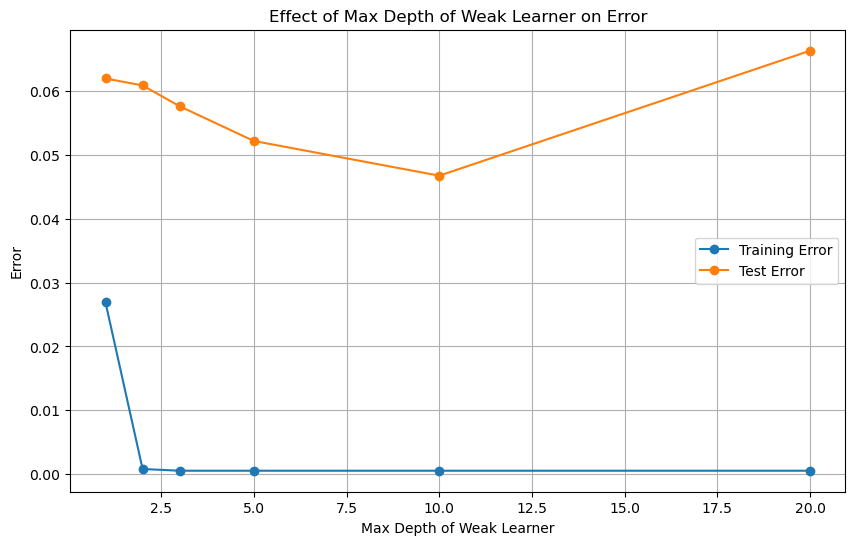

Optimal depth of stump: 10
Minimum test error: 0.0467


In [6]:
# Define a range of max_depth values to experiment with
max_depth_range = [1, 2, 3, 5, 10, 20]

# Initialize lists to store errors
train_errors = []
test_errors = []

# Loop over different values of max_depth for the weak learner
for max_depth in max_depth_range:
    # Define the AdaBoost classifier with a decision tree of the current max_depth
    adaboost_clf = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=max_depth),  # Weak learner with varying depth
        n_estimators=100,                                           # Fixed number of boosting iterations
        learning_rate=1.0,                                          # Learning rate
        random_state=random                                            # For reproducibility
    )
    
    # Train the AdaBoost model on the training data
    adaboost_clf.fit(X_train, y_train)
    
    # Predict on the training and test data
    y_train_pred = adaboost_clf.predict(X_train)
    y_test_pred = adaboost_clf.predict(X_test)
    
    # Compute errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_errors, label="Training Error", marker='o')
plt.plot(max_depth_range, test_errors, label="Test Error", marker='o')
plt.xlabel("Max Depth of Weak Learner")
plt.ylabel("Error")
plt.title("Effect of Max Depth of Weak Learner on Error")
plt.legend()
plt.grid(True)
plt.show()

# Identify the number of features with the minimum test error
optimal_depth = max_depth_range[np.argmin(test_errors)]
print(f"Optimal depth of stump: {optimal_depth}")
print(f"Minimum test error: {min(test_errors):.4f}")


----
- **Define proportions of training data** to use: `[0.1, 0.2, 0.3, 0.5, 0.7, 1.0]`.

- **Initialize lists** to store training and test errors for each proportion.

- **Loop over each proportion**:
  - Sample the training data (`X_train`, `y_train`) based on the current proportion using `sample()`.
  - Create an `AdaBoostClassifier` with:
    - A `DecisionTreeClassifier` (max_depth=1) as the weak learner.
    - 100 boosting iterations (`n_estimators=100`).
    - A learning rate of 1.0.
    - A fixed random seed for reproducibility.
  - Train the model on the sampled training data.
  - Predict on the full training (`X_train`) and test (`X_test`) datasets.
  - Compute training and test errors using `1 - accuracy_score`.
  - Store errors in `train_errors` and `test_errors` lists.

- **Plot the results**:
  - Create a line plot showing training and test errors vs. proportion of training data used.
  - Include labels, a legend, and a grid for clarity.

- **Identify the optimal proportion of training data**:
  - Find the proportion that minimizes the test error.
  - Print the optimal proportion and the corresponding minimum test error.

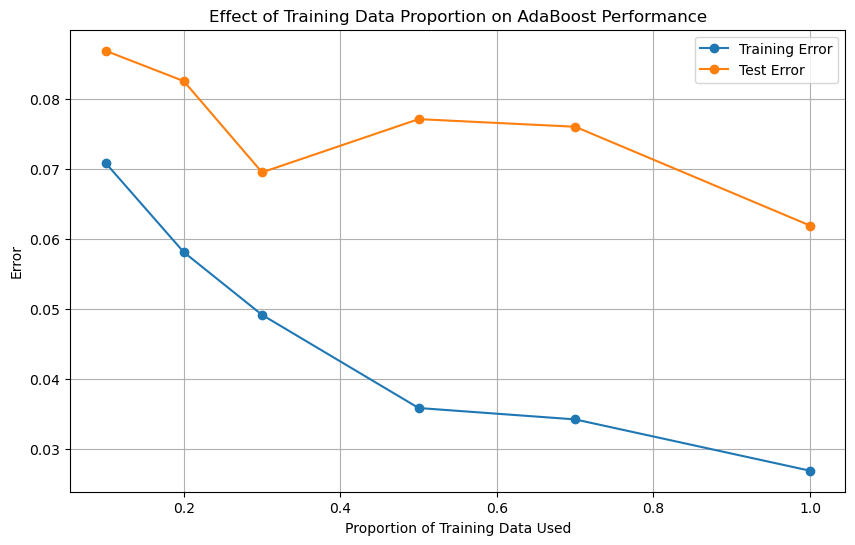

Optimal percentage of training data: 1.0
Minimum test error: 0.0620


In [7]:
# Define proportions of training data to use
training_data_proportions = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0]  # Proportions of training data to use

# Initialize lists to store errors
train_errors = []
test_errors = []

# Loop over different proportions of training data
for proportion in training_data_proportions:
    # Sample the training data based on the current proportion
    X_train_sample = X_train.sample(frac=proportion, random_state=random)
    y_train_sample = y_train[X_train_sample.index]
    
    # Define the AdaBoost classifier
    adaboost_clf = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),  # Fixed weak learner depth
        n_estimators=100,                                   # Fixed number of boosting iterations
        learning_rate=1.0,                                  # Learning rate
        random_state=random                                     # For reproducibility
    )
    
    # Train the AdaBoost model on the sampled training data
    adaboost_clf.fit(X_train_sample, y_train_sample)
    
    # Predict on the full training and test datasets
    y_train_pred = adaboost_clf.predict(X_train)
    y_test_pred = adaboost_clf.predict(X_test)
    
    # Compute errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(training_data_proportions, train_errors, label="Training Error", marker='o')
plt.plot(training_data_proportions, test_errors, label="Test Error", marker='o')
plt.xlabel("Proportion of Training Data Used")
plt.ylabel("Error")
plt.title("Effect of Training Data Proportion on AdaBoost Performance")
plt.legend()
plt.grid(True)
plt.show()

# Identify the number training data with the minimum test error
optimal_p_train = training_data_proportions[np.argmin(test_errors)]
print(f"Optimal percentage of training data: {optimal_p_train}")
print(f"Minimum test error: {min(test_errors):.4f}")

----
- **Define a range of learning rates** to test: `[0.01, 0.1, 0.5, 1.0]`.

- **Initialize lists** to store training and test errors for each learning rate.

- **Loop over each learning rate**:
  - Create an `AdaBoostClassifier` with:
    - A `DecisionTreeClassifier` (max_depth=3) as the weak learner.
    - 100 boosting iterations (`n_estimators=100`).
    - The current learning rate.
    - A fixed random seed for reproducibility.
  - Train the model on `X_train` and `y_train`.
  - Predict on training (`X_train`) and test (`X_test`) data.
  - Compute training and test errors using `1 - accuracy_score`.
  - Store errors in `train_errors` and `test_errors` lists.

- **Plot the results**:
  - Create a line plot showing training and test errors vs. learning rate.
  - Include labels, a legend, and a grid for clarity.

- **Identify the optimal learning rate**:
  - Find the learning rate that minimizes the test error.
  - Print the optimal learning rate and the corresponding minimum test error.

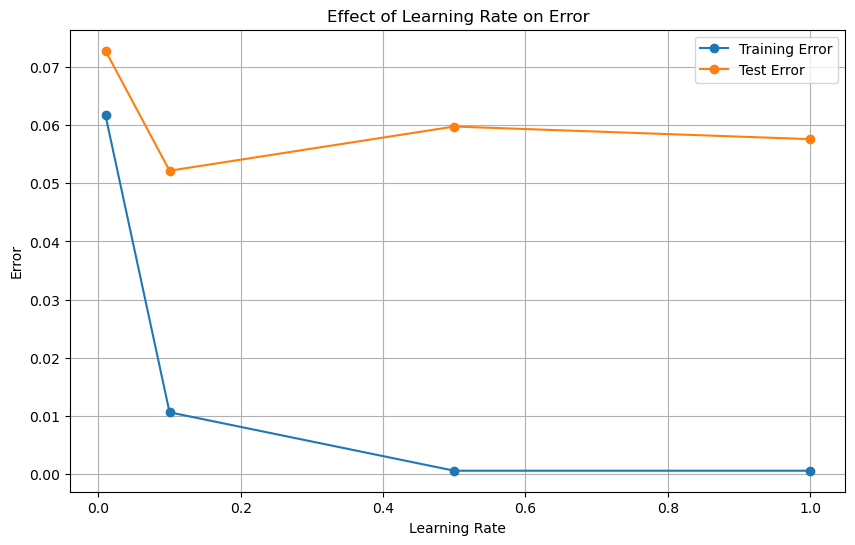

Optimal learning rate: 0.1
Minimum test error: 0.0522


In [8]:
# Define a range of learning rate values to experiment with
learning_rate_range = [0.01, 0.1, 0.5, 1.0]

# Initialize lists to store errors
train_errors = []
test_errors = []

# Loop over different values of learning_rate
for learning_rate in learning_rate_range:
    # Define the AdaBoost classifier with the current learning rate
    adaboost_clf = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=3),  # Fixed weak learner with a depth of 3
        n_estimators=100,                                # Fixed number of boosting iterations
        learning_rate=learning_rate,                     # Varying learning rate
        random_state=random                              # For reproducibility
    )
    
    # Train the AdaBoost model on the training data
    adaboost_clf.fit(X_train, y_train)
    
    # Predict on the training and test data
    y_train_pred = adaboost_clf.predict(X_train)
    y_test_pred = adaboost_clf.predict(X_test)
    
    # Compute errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_range, train_errors, label="Training Error", marker='o')
plt.plot(learning_rate_range, test_errors, label="Test Error", marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Error")
plt.title("Effect of Learning Rate on Error")
plt.legend()
plt.grid(True)
plt.show()

# Identify the optimal learning rate with the minimum test error
optimal_learning_rate = learning_rate_range[np.argmin(test_errors)]
print(f"Optimal learning rate: {optimal_learning_rate}")
print(f"Minimum test error: {min(test_errors):.4f}")
